In [1]:
from numpy import mgrid, linspace, c_, arange, mean, array
from numpy.random import uniform, seed
from sklearn.datasets import make_circles
from matplotlib.pyplot import subplots, axes, scatter, xticks


# Create Noisy Circular Data

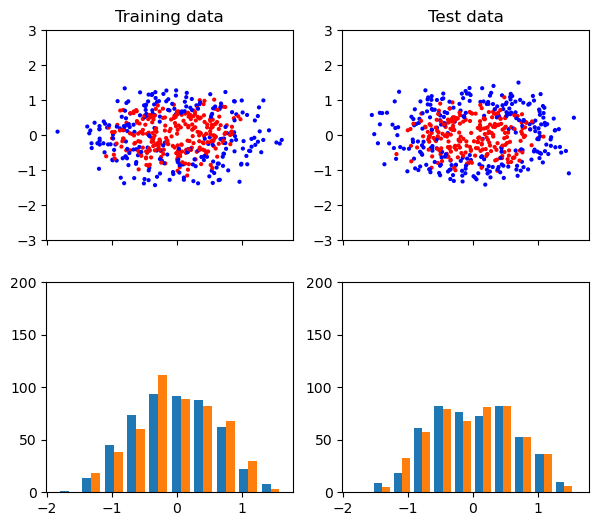

In [6]:
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, factor=.5, noise=.3, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, shuffle=True)

fig, ax = subplots(figsize=(7, 6), ncols=2, nrows=2, sharex=True)

ax[0, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=4, cmap='bwr')
ax[0, 1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=4, cmap='bwr')


ax[1, 0].hist(X_train)

ax[1, 1].hist(X_test)

ax[0, 0].set_title('Training data')
ax[0, 1].set_title('Test data')

ax[0, 0].set_ylim(-3, 3)
ax[0, 1].set_ylim(-3, 3)

ax[1, 0].set_ylim(0, 200)
ax[1, 1].set_ylim(0, 200);


# Classify with Multiple Classifiers

In [7]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

RANDOM_STATE  = 123
seed(RANDOM_STATE)

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Random Forest)': AdaBoostClassifier(RandomForestClassifier(random_state=RANDOM_STATE)),
    'Extra Trees': ExtraTreesClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Extra Tree)': AdaBoostClassifier(ExtraTreesClassifier(random_state=RANDOM_STATE)),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'SVC (RBF)': SVC(random_state=RANDOM_STATE),
    'SVC (Linear)': LinearSVC(random_state=RANDOM_STATE),
    'Multi-layer Perceptron': MLPClassifier(max_iter=5000, random_state=RANDOM_STATE)
}


In [8]:
ft_min, ft_max = -1.5, 1.5

# Constructing (2 grids x 300 rows x 300 cols):
grid_1, grid_2 = mgrid[ft_min:ft_max:.01, ft_min:ft_max:.01] 

# We need only the shape for one of the grids (i.e. 300 x  300):
grid_shape = grid_1.shape

# state space grid for testing
new_obs = c_[grid_1.ravel(), grid_2.ravel()]


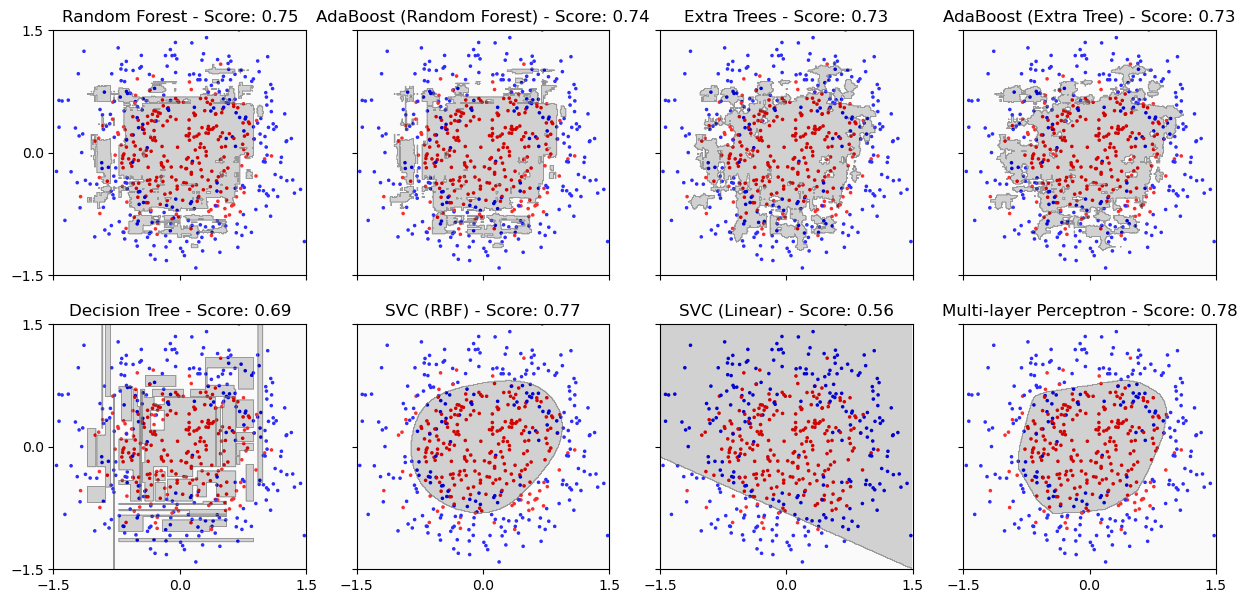

In [9]:
fig, all_axes = subplots(figsize=[15, 7], ncols=4, nrows=2, sharey=True, sharex=True)

contour_levels = linspace(0, 1, 6)

for ax, (name, clf) in zip(all_axes.ravel(), classifiers.items()):
    # Training the model using training data:     
    clf.fit(X_train, y_train)

    y_pred      = clf.predict(new_obs)
    y_pred_grid = y_pred.reshape(grid_shape)

    # Evaluating the score using test data:
    score = clf.score(X_test, y_test)

    # Scattering the test data only:     
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=10, cmap='bwr', marker='.')

    ax.contourf(grid_1, grid_2, y_pred_grid, cmap='gray_r', alpha=.2, levels=contour_levels)

    ax.set_ylim(ft_min, ft_max)
    ax.set_xlim(ft_min, ft_max)
    ax.set_yticks([-1.5, 0, 1.5])
    ax.set_xticks([-1.5, 0, 1.5])

    label = '{} - Score: {:.2f}'.format(name, score)
    ax.set_title(label , fontsize=12);
